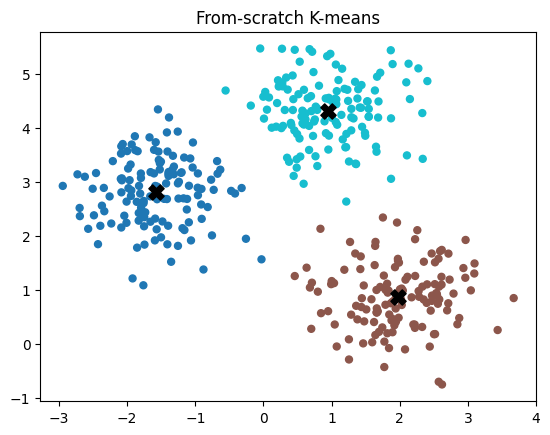

In [1]:
# kmeans_from_scratch.py

import numpy as np

def kmeans(X, k, max_iters=100, tol=1e-4):
    # Initialize centroids by sampling k points
    rng = np.random.default_rng(42)
    centroids = X[rng.choice(len(X), size=k, replace=False)]

    for i in range(max_iters):
        # Assignment step: nearest centroid
        dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)

        # Update step: recompute centroids
        new_centroids = np.vstack([X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
                                   for j in range(k)])

        # Convergence check
        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids
        if shift < tol:
            break

    return labels, centroids

if __name__ == "__main__":
    # Demo with synthetic data
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    X, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.6, random_state=0)
    labels, centroids = kmeans(X, k=3)

    plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=25)
    plt.scatter(centroids[:,0], centroids[:,1], c='black', s=120, marker='X')
    plt.title('From-scratch K-means')
    plt.show()